Import Modules

In [22]:
# Analysis
import pandas as pd
import seaborn as sns
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset

# Building the model
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam

# Evaluating model
from sklearn.metrics import confusion_matrix

# Visualization
from PIL import Image

Data Visualization

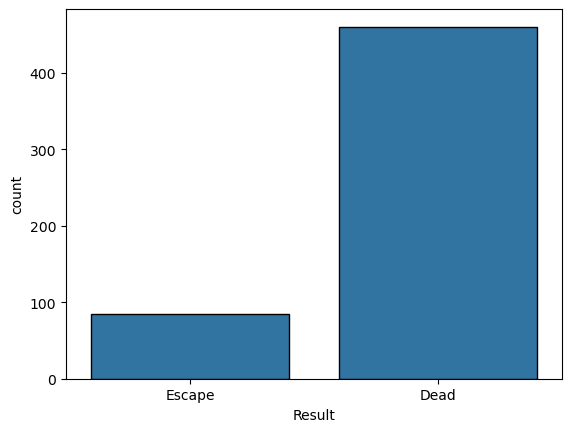

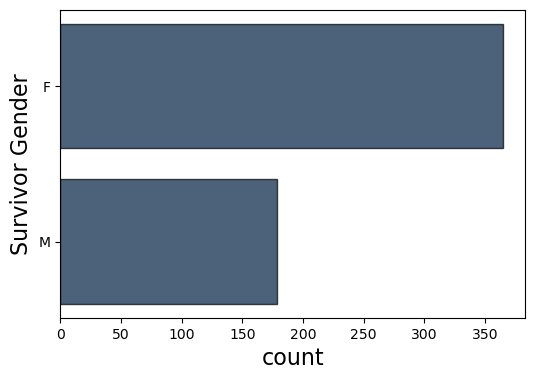

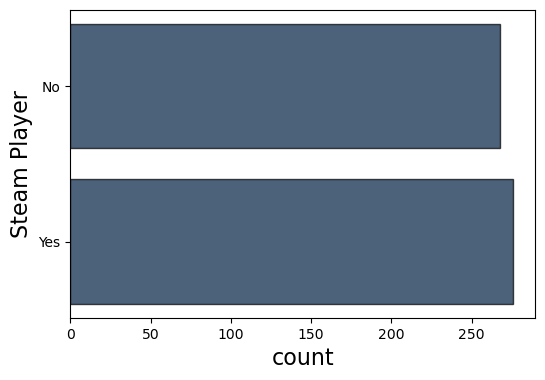

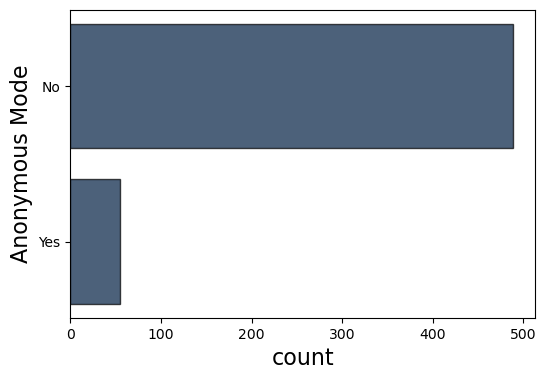

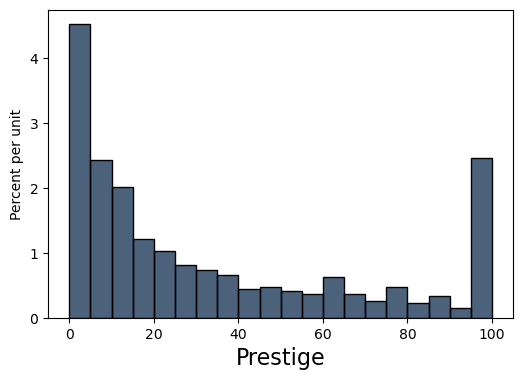

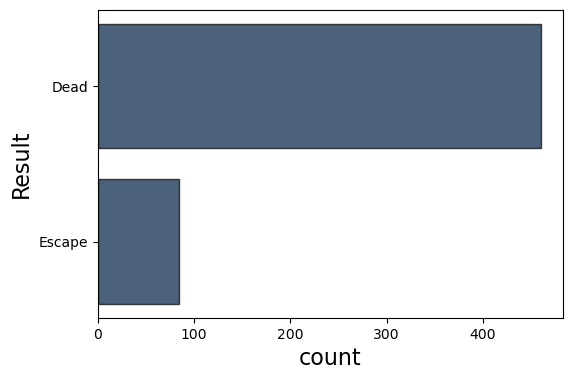

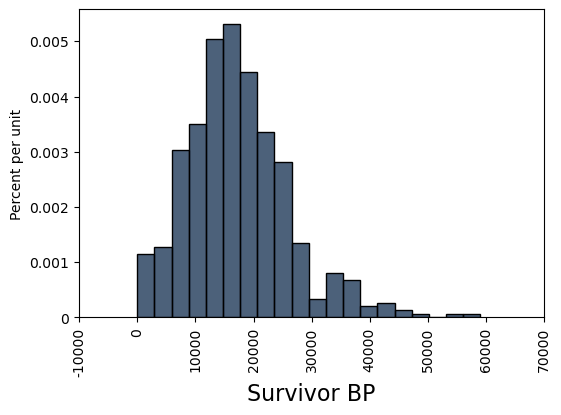

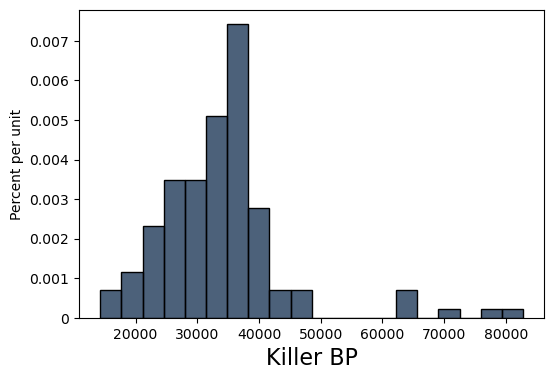

In [23]:
# Distribution of Survivors
DBD = Table.read_table('DBDData.csv')
surv_counts = DBD.group('Survivor Gender')
surv_counts.barh('Survivor Gender')
plt.show()

# Distribution of Steam Players
steam_dist = DBD.group('Steam Player')
steam_dist.barh('Steam Player')
plt.show()

# Distribution of Anonymous Mode
steam_dist = DBD.group('Anonymous Mode')
steam_dist.barh('Anonymous Mode')
plt.show()

# Distribution of Prestige (takes up a lot of space)
#prestige_dist = DBD.group('Prestige')
#prestige_dist.barh('Prestige')
#plt.show()

# Distribution of Prestige (Histogram)
DBD.hist('Prestige', bins=20)
plt.show()

# Distribution of Result
result_dist = DBD.group('Result')
result_dist.barh('Result')
plt.show()

# Distribution of Survivor BP

DBD.hist('Survivor BP', bins=20)
plt.show()

# Distribution of Killer BP

DBD.hist('Killer BP', bins=20)
plt.show()

Brief Overview

In [24]:
dataset = pd.read_csv('DBDData.csv')
print(dataset.shape)
dataset.head(10)

(544, 9)


,Survivor Gender,Steam Player,Anonymous Mode,Prestige,Item,Map Area,Survivor BP,Killer BP,Result
0,M,No,No,26,Medkit,NaN,21706.0,25250.0,Escape
1,M,No,No,11,Medkit,NaN,16049.0,25250.0,Dead
2,F,No,No,11,Toolbox,NaN,15402.0,25250.0,Dead
3,F,No,No,5,Toolbox,NaN,7048.0,25250.0,Dead
4,F,Yes,No,54,Toolbox,NaN,15996.0,25700.0,Dead
5,F,No,No,34,Toolbox,NaN,15203.0,25700.0,Escape
6,F,No,Yes,27,Toolbox,NaN,15083.0,25700.0,Dead
7,F,Yes,Yes,100,NaN,NaN,3666.0,25700.0,Dead
8,M,Yes,No,65,Toolbox,NaN,18624.0,36097.0,Dead
9,F,No,No,17,Medkit,NaN,18040.0,36097.0,Dead


In [25]:
# Distribution of results
sns.countplot(x='Result', data = dataset)

<Axes: xlabel='Result', ylabel='count'>

In [26]:
dataset = pd.DataFrame(dataset)
dataset['Result'] = dataset['Result'].map({'Escape': 1, 'Dead': 0})
dataset['is_Female'] = dataset['Survivor Gender'].map({'F': 1, 'M': 0})
dataset = dataset.drop(columns = 'Survivor Gender')
dataset['Steam Player'] = dataset['Steam Player'].map({'Yes': 1, 'No': 0})
dataset['Anonymous Mode'] = dataset['Anonymous Mode'].map({'Yes': 1, 'No': 0})
dataset = pd.get_dummies(dataset, columns = ['Item'], dtype = int, prefix = 'Brought')
new_cols = ['is_Female', 'Steam Player', 'Anonymous Mode', 'Prestige', 'Map Area', 'Brought_Firecracker', 'Brought_Flashlight', 'Brought_Key', 'Brought_Map', 'Brought_Medkit', 'Brought_Toolbox', 'Survivor BP', 'Killer BP', 'Result']
dataset = dataset.reindex(columns = new_cols)

dataset_cleaned = dataset.dropna()

dataset.head(10)

,is_Female,Steam Player,Anonymous Mode,Prestige,Map Area,Brought_Firecracker,Brought_Flashlight,Brought_Key,Brought_Map,Brought_Medkit,Brought_Toolbox,Survivor BP,Killer BP,Result
0,0,0,0,26,NaN,0,0,0,0,1,0,21706.0,25250.0,1
1,0,0,0,11,NaN,0,0,0,0,1,0,16049.0,25250.0,0
2,1,0,0,11,NaN,0,0,0,0,0,1,15402.0,25250.0,0
3,1,0,0,5,NaN,0,0,0,0,0,1,7048.0,25250.0,0
4,1,1,0,54,NaN,0,0,0,0,0,1,15996.0,25700.0,0
5,1,0,0,34,NaN,0,0,0,0,0,1,15203.0,25700.0,1
6,1,0,1,27,NaN,0,0,0,0,0,1,15083.0,25700.0,0
7,1,1,1,100,NaN,0,0,0,0,0,0,3666.0,25700.0,0
8,0,1,0,65,NaN,0,0,0,0,0,1,18624.0,36097.0,0
9,1,0,0,17,NaN,0,0,0,0,1,0,18040.0,36097.0,0


In [27]:
dataset_cleaned.head(10)

,is_Female,Steam Player,Anonymous Mode,Prestige,Map Area,Brought_Firecracker,Brought_Flashlight,Brought_Key,Brought_Map,Brought_Medkit,Brought_Toolbox,Survivor BP,Killer BP,Result
212,0,0,0,100,9984.0,0,1,0,0,0,0,26625.0,29534.0,1
213,0,1,0,0,9984.0,0,0,0,0,0,0,19215.0,29534.0,0
214,1,0,1,2,9984.0,0,1,0,0,0,0,18981.0,29534.0,0
215,1,0,0,100,9984.0,0,0,0,0,1,0,12000.0,29534.0,0
216,1,1,0,100,9984.0,0,0,0,0,0,1,23566.0,32020.0,0
217,0,1,0,49,9984.0,0,0,0,0,1,0,21380.0,32020.0,1
218,0,1,1,46,9984.0,0,0,0,0,1,0,19132.0,32020.0,0
219,0,1,0,86,9984.0,0,0,1,0,0,0,12330.0,32020.0,0
220,1,1,0,4,8960.0,0,0,0,0,0,1,26392.0,28671.0,1
221,1,1,0,100,8960.0,0,1,0,0,0,0,20205.0,28671.0,0


Identify input columns and label (what to predict)


In [28]:
X = dataset_cleaned.iloc[:, :-1]
y = dataset_cleaned.iloc[:, -1]

Split data into train and test sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25, stratify = y)
print(y_train.describe())
print(y_test.describe())

count    195.000000
mean       0.117949
std        0.323378
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Result, dtype: float64
count    97.000000
mean      0.123711
std       0.330962
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Result, dtype: float64


Dataframes to numpy

In [30]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train[0], y_train[0]

(array([  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   9.98400000e+03,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.18730000e+04,
          2.87670000e+04]),
 0)

Standardize data

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0], y_train[0]

(array([-1.46463691,  1.02597835, -0.30903983, -0.69074305,  0.56854927,
        -0.10179732,  1.63684003, -0.125     ,  0.        , -0.86085506,
        -0.37463432, -0.5536813 , -0.33960015]),
 0)

Build dataset classes

In [32]:
# Training data

class TrainingData(Dataset):
    def __init__(self, X_data, y_data):
        self.x_data = X_data
        self.y_data = y_data
    
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.x_data)
    
training_data = TrainingData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))

# Test data

class TestData(Dataset):

        def __init__(self, X_data):
             self.x_data = X_data
        
        def __getitem__(self, index):
             return self.x_data[index]
        
        def __len__(self):
             return len(self.x_data)
        
test_data = TestData(torch.FloatTensor(X_test))

Modeling

In [33]:
# Hyperparameters

Hidden_size = 64

Epochs = 30
Batch_size = 32
Learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [34]:
# Dataloader

train_loader = DataLoader(dataset = training_data, batch_size = Batch_size)
test_loader = DataLoader(dataset = test_data, batch_size = 1)

Define the model

In [35]:
class DBDModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(DBDModel, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relul = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.batchnorm2 = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(0.1)
        self.out = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.l1(x)
        x = self.relul(x)
        x = self.batchnorm1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.out(x)
        return x

Initialize the model

In [36]:
# Initialization
model = DBDModel(input_size = X_train.shape[1], hidden_size = Hidden_size)
model.to(device)

# Loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr = Learning_rate)
model

DBDModel(
  (l1): Linear(in_features=13, out_features=64, bias=True)
  (relul): ReLU()
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (out): Linear(in_features=64, out_features=1, bias=True)
)

Accuracy of model

In [37]:
# Accuracy metric
def binary_accuracy(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    accuracy = correct_results_sum / y_test.shape[0]
    accuracy = torch.round(accuracy * 100)

    return accuracy

In [38]:
model.train() # only needed for dropout and batchnorm layers
for e in range(1, Epochs + 1):
    epoch_loss = 0
    epoch_accuracy = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch.unsqueeze(1))
        accuracy = binary_accuracy(y_pred, y_batch.unsqueeze(1))

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_accuracy += accuracy.item()

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss / len(train_loader):.5f} | Accuracy: {epoch_accuracy / len(train_loader):.3f}')

Epoch 001: | Loss: 0.68855 | Accuracy: 55.429
Epoch 002: | Loss: 0.63839 | Accuracy: 68.429
Epoch 003: | Loss: 0.58335 | Accuracy: 69.429
Epoch 004: | Loss: 0.55644 | Accuracy: 76.286
Epoch 005: | Loss: 0.52038 | Accuracy: 81.143
Epoch 006: | Loss: 0.49889 | Accuracy: 79.714
Epoch 007: | Loss: 0.49290 | Accuracy: 83.714
Epoch 008: | Loss: 0.45269 | Accuracy: 85.143
Epoch 009: | Loss: 0.43980 | Accuracy: 90.000
Epoch 010: | Loss: 0.41166 | Accuracy: 92.714
Epoch 011: | Loss: 0.39146 | Accuracy: 94.429
Epoch 012: | Loss: 0.36463 | Accuracy: 95.286
Epoch 013: | Loss: 0.33245 | Accuracy: 96.571
Epoch 014: | Loss: 0.30826 | Accuracy: 96.143
Epoch 015: | Loss: 0.30646 | Accuracy: 95.714
Epoch 016: | Loss: 0.28559 | Accuracy: 96.571
Epoch 017: | Loss: 0.25162 | Accuracy: 97.429
Epoch 018: | Loss: 0.23532 | Accuracy: 97.000
Epoch 019: | Loss: 0.21174 | Accuracy: 98.286
Epoch 020: | Loss: 0.19918 | Accuracy: 99.571
Epoch 021: | Loss: 0.16818 | Accuracy: 99.143
Epoch 022: | Loss: 0.16928 | Accur

In [39]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
    
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [40]:
confusion_matrix(y_test, y_pred_list)

array([[79,  6],
       [ 3,  9]], dtype=int64)

Use the model

In [41]:
# Sample from data
survivor = dataset_cleaned.sample()
row_number = survivor.index[0]

# Clean data
survivor = survivor[dataset_cleaned.columns].values[0][:-1]
survivor = scaler.transform(survivor.reshape(1, -1))
survivor = torch.FloatTensor(survivor)

# Predict
model.eval()
with torch.no_grad():
    y_pred = model(survivor.to(device))
    y_pred = torch.sigmoid(y_pred)

# Output
print('Escape prediction:', y_pred.item() >= 0.5, f'\nStrength: {y_pred.item():.3f}')

# Check
print('Actual result:', dataset.iloc[row_number]['Result'] >= 0.5)
print(f'\nActual data:\n{dataset.iloc[row_number]}')

Escape prediction: False 
Strength: 0.080
Actual result: False

Actual data:
is_Female                  1.0
Steam Player               1.0
Anonymous Mode             1.0
Prestige                  13.0
Map Area                8704.0
Brought_Firecracker        0.0
Brought_Flashlight         0.0
Brought_Key                0.0
Brought_Map                0.0
Brought_Medkit             1.0
Brought_Toolbox            0.0
Survivor BP            23853.0
Killer BP              38527.0
Result                     0.0
Name: 541, dtype: float64


Save Model and Scaler for Flask API


In [42]:
# Save the trained model and scaler for Flask API
import pickle
import os

# Ensure we're in the right directory (adjust path if needed)
project_dir = r'c:\Users\dacur\Desktop\DBD Project'
if os.path.exists(project_dir):
    os.chdir(project_dir)
else:
    print(f"Warning: Directory {project_dir} not found. Save files to current directory.")

# Save model state
torch.save(model.state_dict(), 'dbd_model.pth')
print("✓ Model weights saved to dbd_model.pth")

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved to scaler.pkl")

# Save model architecture parameters
model_info = {
    'input_size': X_train.shape[1],
    'hidden_size': Hidden_size
}
with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)
print("✓ Model info saved to model_info.pkl")

print("\n✅ All files saved successfully!")
print(f"\nFiles saved to: {os.getcwd()}")
print("\nFiles created:")
print("  - dbd_model.pth")
print("  - scaler.pkl")
print("  - model_info.pkl")
print("\nYou can now run the Flask app with: python app.py")



✓ Model weights saved to dbd_model.pth
✓ Scaler saved to scaler.pkl
✓ Model info saved to model_info.pkl

✅ All files saved successfully!

Files saved to: c:\Users\dacur\Desktop\DBD Project

Files created:
  - dbd_model.pth
  - scaler.pkl
  - model_info.pkl

You can now run the Flask app with: python app.py
